<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/California_Housing_dataset_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California housing dataset
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html **bold text**

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [51]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
import matplotlib.pyplot as plt

In [49]:
housing_data = fetch_california_housing(as_frame=True)
print('Input features:\n',housing_data.data.head())
print('Target feature:\n',housing_data.target.head())

x = housing_data.data
y = housing_data.target

# normalize the input features (attributes)
scalar = MinMaxScaler()
xn = scalar.fit_transform(x)
print('minmax scalar:\n', xn)   # MinMaxScaler is applied column-wise (normalize each column)
print('Normalize:\n', normalize(x))  # Normalizer is applied row-wise (normalize each example - do not use it)

xtrain, xtest, ytrain, ytest = train_test_split(xn, y, test_size=0.2, random_state=42)
print(len(xtrain))

print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

Input features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target feature:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
minmax scalar:
 [[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33

In [54]:
# build your first Multilayer Perceptron (MLP)
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)   #  By default, activation function is set to None. That means that by default it is a linear activation.
])

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])
# Rprop works for very large datasets and need to perform mini-batch weights update
# RMSprop works for SGD

model.summary()

history = model.fit(xtrain, ytrain, epochs=300, validation_split=0.2, batch_size=1024, verbose=1)

loss, mae, mse = model.evaluate(xtest, ytest, verbose=1)
print('loss:', loss, mae, mse)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                576       
                                                                 
 dense_19 (Dense)            (None, 8)                 520       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 20ms/step - loss: 5.1526 - mae: 1.9571 - mse: 5.1526 - val_loss: 4.4894 - val_mae: 1.7695 - val_mse: 4.4894
Epoch 2/300
13/13 [==============================] - 0s 8ms/step - loss: 3.9217 - mae: 1.6127 - mse: 3.9217 - val_loss: 3.4332 - val_mae: 1.4526 - val_m

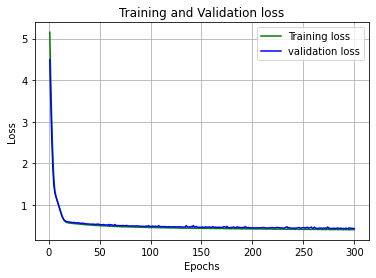

In [61]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()